<a href="https://colab.research.google.com/github/Raexann/image-classification/blob/main/Xception_with_LSTM_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Data

Using Beans Disease Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/beans.zip' -d '/content/bean'

Archive:  /content/drive/MyDrive/beans.zip
replace /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.0.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.1.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.10.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.11.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.12.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.13.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.14.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.15.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/angular_leaf_spot_test.16.jpg  
  inflating: /content/bean/test/test/angular_leaf_spot/a

In [ ]:
train_data_dir='/content/bean/train/train'
validation_data_dir='/content/bean/validation/validation'
test_data_dir='/content/bean/test/test'

In [ ]:
img='/content/bean/test/test'

In [ ]:
class_names=['angular_leaf_spot','bean_rust','healthy']

In [ ]:
import os
import random
import matplotlib.pyplot as plt

Visualizing some examples

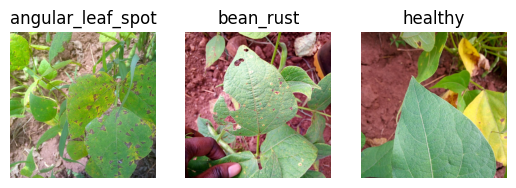

In [ ]:
images = []

# Loop through all class names and pick a random image for each class
for class_name in class_names:
    image_files = os.listdir(os.path.join(img, class_name))
    image_file = random.choice(image_files)
    images.append(os.path.join(img, class_name, image_file))

# Loop through all the images and display them in the subplot
fig, ax = plt.subplots(1,3)
for i in range(3):
    img = plt.imread(images[i])
    ax[i].imshow(img)
    ax[i].set_title(class_names[i])
    ax[i].axis('off')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_width=256
img_height = 256
batch_size=32

Splitting data into train and validation with Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1034 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 133 images belonging to 3 classes.


Import required libraries for model building

In [ ]:
from keras.applications.xception import Xception
from keras.layers import GlobalAveragePooling2D, Dense, Reshape, LSTM, Conv2D
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
input_shape=(img_width, img_height,3)

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
base_model = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3), classes=3)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable=False

#LSTM

LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images. This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

Building the model with base model which is Xception

In [ ]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Reshape((1, 2048)))  # Reshape to have a time step dimension
model.add(LSTM(64)) #Adding LTSM for Recurrent neural network
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_17  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 reshape_2 (Reshape)         (None, 1, 2048)           0         
                                                                 
 lstm_36 (LSTM)              (None, 64)                540928    
                                                                 
 dense_20 (Dense)            (None, 256)               16640     
                                                                 
 dense_21 (Dense)            (None, 3)                 771       
                                                     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the model

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
32/32 [==============================] - 592s 18s/step - loss: 0.6947 - accuracy: 0.7226 - val_loss: 0.5473 - val_accuracy: 0.8203
Epoch 2/10
32/32 [==============================] - 565s 18s/step - loss: 0.4766 - accuracy: 0.7974 - val_loss: 0.3612 - val_accuracy: 0.8359
Epoch 3/10
32/32 [==============================] - 568s 18s/step - loss: 0.3634 - accuracy: 0.8563 - val_loss: 0.3907 - val_accuracy: 0.8516
Epoch 4/10
32/32 [==============================] - 541s 17s/step - loss: 0.2872 - accuracy: 0.8942 - val_loss: 0.2828 - val_accuracy: 0.8750
Epoch 5/10
32/32 [==============================] - 565s 18s/step - loss: 0.2909 - accuracy: 0.8812 - val_loss: 0.2881 - val_accuracy: 0.8750
Epoch 6/10
32/32 [==============================] - 565s 18s/step - loss: 0.2281 - accuracy: 0.9162 - val_loss: 0.2716 - val_accuracy: 0.8828
Epoch 7/10
32/32 [==============================] - 552s 17s/step - loss: 0.2044 - accuracy: 0.9142 - val_loss: 0.1950 - val_accuracy: 0.9141
Epoch 

Generating test set and evaluating the model based on it

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 128 images belonging to 3 classes.


In [ ]:
scores = model.evaluate(test_generator)
scores

4/4 [==============================] - 47s 11s/step - loss: 0.3548 - accuracy: 0.8438


[0.3548012971878052, 0.84375]